<a href="https://colab.research.google.com/github/HninSu-15/USA_house-price-prediction/blob/main/US_House_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# House Price Prediction Project
**Goal:** Predict house prices based on features like bedrooms, bathrooms, sqft, etc.

**Dataset:** Kaggle dataset by shree1992

**Tools:** Python, Pandas, Scikit-learn



Step 1: Install kagglehub

Step 2: Download the dataset


In [57]:
import kagglehub

path = kagglehub.dataset_download("shree1992/housedata")
print("Path:", path)


100%|██████████| 432k/432k [00:00<00:00, 798kB/s]

Extracting files...
Path: /root/.cache/kagglehub/datasets/shree1992/housedata/versions/2


Step 3: Load the CSV file

 Load the dataset and check first 5 rows.
 We are using pandas to read CSV and look at sample data.
 pandas: for data manipulation



In [58]:
import pandas as pd
import os

# Find CSV file automatically
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_path = os.path.join(path, file)
        print("CSV file:", csv_path)

df = pd.read_csv(csv_path)
df


CSV file: /root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/output.csv
CSV file: /root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Step 4:  Exploratory Data Analysis (EDA)

**We perform EDA to understand the data, identify patterns, detect anomalies, and decide which features are most important for modeling.**
Visualize data, check distributions, detect outliers.
 Scatter plots show relationships between features and price.
 Correlation heatmap shows which features are strongly related to price.


In [59]:
# EDA
df.shape

(4600, 18)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [40]:
df.columns
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [60]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


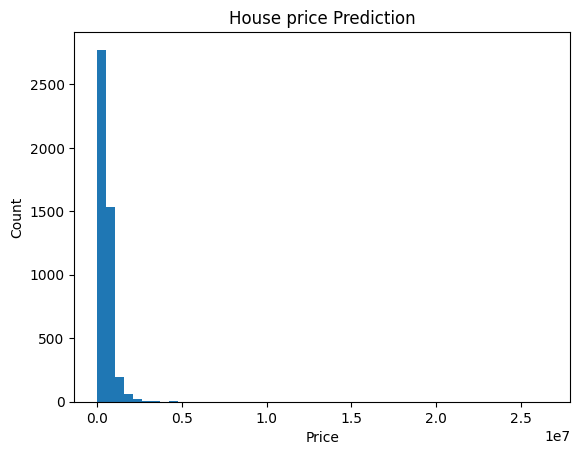

In [18]:
  # Visual EDA
# Price Distribution
import matplotlib.pyplot as plt
plt.hist(df['price'],bins=50)
plt.xlabel("Price")
plt.ylabel('Count')
plt.title("House price Prediction")
plt.show()

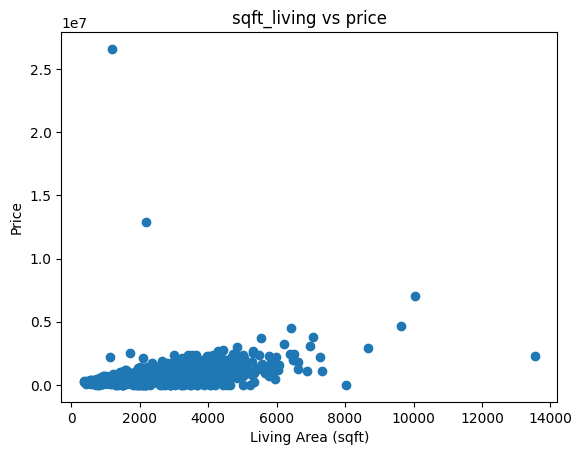

In [19]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('sqft_living vs price')
plt.show()



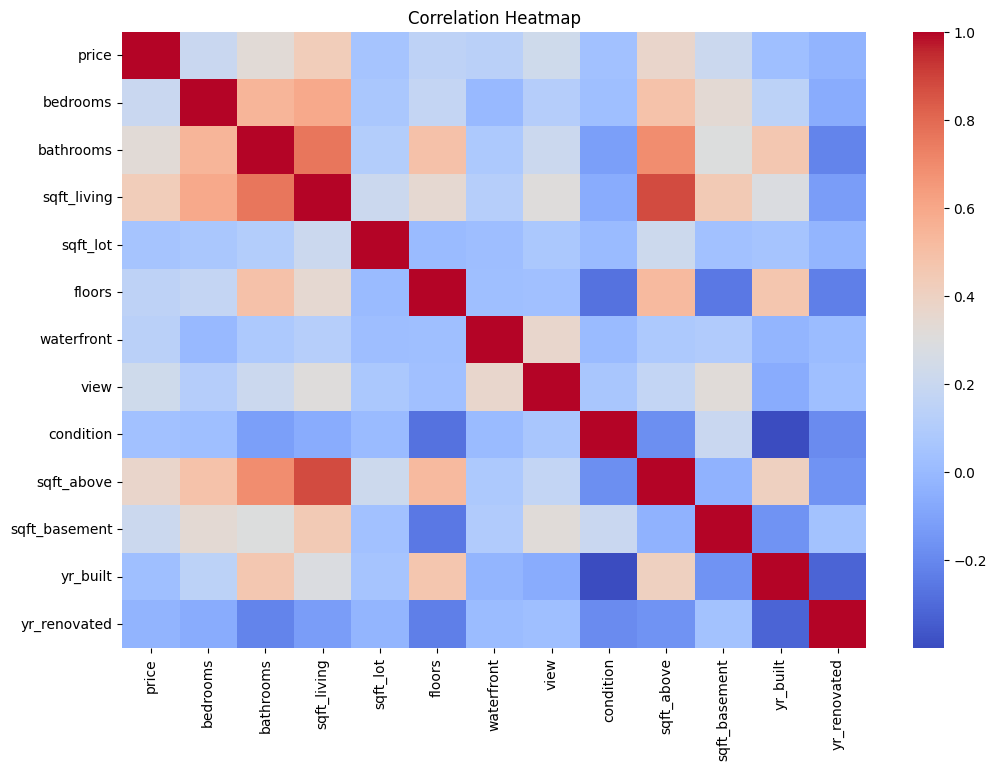

In [61]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Step 5 : Data Cleaning

**We do this step to **clean the data**, ensure it is realistic, and help the model learn patterns correctly.**
Remove zero price houses and outliers because zero price is invalid and also outliers may affect model accuracy



In [10]:
df['price'].min()

0.0

In [43]:
df = df[df['price'] > 0]
df['price'].min()

7800.0

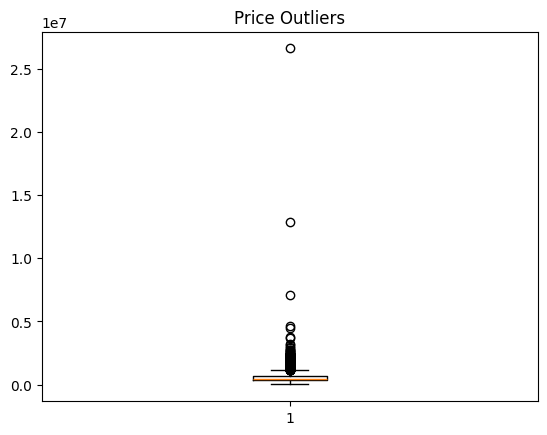

In [44]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.show()


In [45]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Step 6 : Feature Selection

Select important features for model based on the heatmap correlation

In [46]:
# Select the dependent and target

sel_feature = ['bathrooms','sqft_living','sqft_above']
X =df_clean[sel_feature].values
y= df_clean['price'].values

# import the library to split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=42)

# print the training and testing size
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(3017, 3) (1294, 3)
(3017,) (1294,)


Step 7 : Model Training

**Use Polynomial Regression model**

Explain each step:
1. StandardScaler: scale features to have similar ranges, which helps the model converge faster and perform better.
2. PolynomialFeatures: add polynomial terms to capture non-linear relationships between features and price.
3. LinearRegression: fit a linear model on the transformed polynomial features.
4. GridSearchCV: automatically find the best polynomial degree by testing multiple options and evaluating performance with cross-validation.

 Polynomial Regression is used because the relationship between house features (like sqft, bedrooms) and price is often non-linear.
This training process ensures we select the best degree and properly scale features, improving model accuracy and generalization.

In [48]:
# Use pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

steps = [('scalar',StandardScaler()),
         ('poly', PolynomialFeatures()),
         ('liReg',LinearRegression())]

parameters = {'poly__degree':[2,3,4,5,6,7]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(pipeline, parameters,
                         cv =5,
                         scoring='neg_mean_squared_error',
                         verbose=True)

poly_grid.fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error', verbose=True)

In [49]:
best_parameters =poly_grid.best_params_

print("best order is :",best_parameters)

best order is : {'poly__degree': 4}


Step 8 : Model Evalution

Compare actual vs predicted values

 Metrics:
1. MAE (Mean Absolute Error): the average absolute difference between the actual prices and predicted prices. Lower MAE means predictions are closer to real values.  
2. MSE (Mean Squared Error): the average of squared differences between actual and predicted prices. It penalizes larger errors more than MAE.  
3. R² score: measures how much of the variance in house prices is explained by the model. R² closer to 1 means the model explains most of the variation.

Why we use these metrics?

They help us **quantify the model's accuracy**, understand how well it predicts prices, and compare different models objectively.

In [50]:
# Test Performance between predict and Actual
# Predict the price for test data
import numpy as np
ytest_pred =poly_grid.predict(X_test)


# Predict the price for train data
ytrain_pred = poly_grid.predict(X_train)

df_train_result = pd.DataFrame({'Actual':np.round(y_train),'Predict_values': np.round(ytrain_pred)})
df_train_result


,Actual,Predict_values
0,380000.0,564090.0
1,519950.0,358250.0
2,205000.0,342855.0
3,339000.0,315443.0
4,240000.0,265420.0
...,...,...
3012,935000.0,416402.0
3013,225000.0,302918.0
3014,839000.0,701116.0
3015,360000.0,452860.0


In [51]:

df_test_result = pd.DataFrame({'Actual':np.round(y_test),'Predict_values': np.round(ytest_pred)})
df_test_result

,Actual,Predict_values
0,378000.0,466361.0
1,309000.0,543750.0
2,1065000.0,924667.0
3,330000.0,517215.0
4,450000.0,489232.0
...,...,...
1289,455000.0,695149.0
1290,396675.0,418043.0
1291,310000.0,311193.0
1292,175000.0,349609.0


Visualize the Result

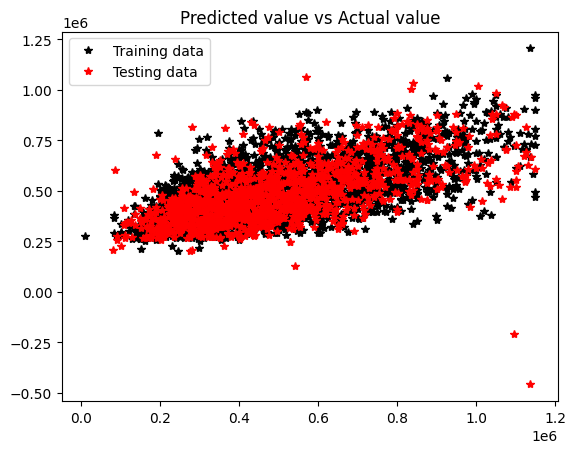

In [52]:
import matplotlib.pyplot as plt
plt.plot(y_train,ytrain_pred,'k*')
plt.plot(y_test,ytest_pred,'r*')

plt.title("Predicted value vs Actual value")
plt.legend(["Training data","Testing data"])
plt.show()



In [53]:
#import the required modules

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Evaluate on training set
mae = mean_absolute_error(y_train,ytrain_pred)
print("Mean bsolute error: ",np.round(mae))
mse = mean_squared_error(y_train,ytrain_pred)
print("Mean squared error:",mse)
r2 = r2_score(y_train,ytrain_pred)
print("R2 score is :", r2)

#Evaluate on testing set
mae = mean_absolute_error(y_test,ytest_pred)
print("Mean bsolute error: ",np.round(mae))
mse = mean_squared_error(y_test,ytest_pred)
print("Mean squared error:",mse)
r2 = r2_score(y_test,ytest_pred)
print("R2 score is :", r2)


Mean bsolute error:  128691.0
Mean squared error: 26185005087.08506
R2 score is : 0.43227844629371925
Mean bsolute error:  132490.0
Mean squared error: 30831821349.943924
R2 score is : 0.3490743223734858


In [55]:
np.mean(y_test)

np.float64(489709.0384314405)

Step 9 : Save the Model

We save the Model to avoid retraining every time we want to predict ,it also
allows reuse for future predictions or deployment and
makes it easy to share the trained model with others.


In [63]:
import pickle

# Save the trained model to a file
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(poly_grid, f)

print("Model saved successfully!")


Model saved successfully!


# Model Insight Summary and Limitions

The Polynomial Regression model showed moderate but limited predictive performance on the housing dataset. On the test set, the model achieved a Mean Absolute Error (MAE) of approximately $132,000,

wich is  about 27% of the average house price ($489,709).

 This indicates that on a typical $490k home,

 the model's predictions deviate by roughly $130k, suggesting substantial prediction uncertainty.

The test R² score of 0.35 shows that the model explains only 35% of the variability in housing prices, leaving 65% unexplained. This level of performance indicates that the model captures some meaningful relationships but lacks the capacity to fully represent the complex, nonlinear dynamics of real estate pricing.

Both training and testing errors were similar (MAE: 128k vs 132k, R²: 0.43 vs 0.35), indicating minimal overfitting. The model performs consistently, but the overall accuracy remains limited. This suggests the challenge is not model memorization, but rather insufficient predictive power of the chosen features and model class.

**Overall, while the model establishes a baseline and provides preliminary insights, additional feature engineering, model enhancement, and data refinement are needed to achieve stronger predictive performance.**